In [1]:
#Import all the required packages
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

#Use Python's "magic" commands since we want to see the graphs within this notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Define our start and end variables to be used in DataReader function and then 

start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,4,24)
un = web.DataReader("UAL","yahoo",start, end)

In [3]:
un.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,74.019997,74.019997,72.150002,72.709999,2517600,72.709999
2017-01-04,72.449997,73.790001,72.449997,73.019997,2199300,73.019997


In [4]:
print (un.index.get_loc("2017-04-10"))

67


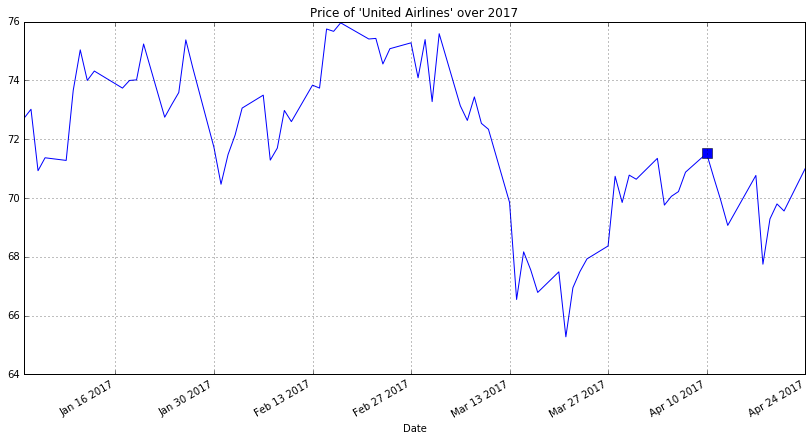

In [5]:
# Modify the rcParams to control the size of the graph
# The figure.figsize controls in the figure size in inches
pylab.rcParams["figure.figsize"] = (14,7)

markers_on = [(un.index.get_loc("2017-04-10"))]
marker = 's'
title = "Price of 'United Airlines' over 2017" 
un["Adj Close"].plot(grid=True, title = title, markevery = markers_on, marker = marker, markersize=10)

In [6]:
# American Airlines = AAL
# Delta Airlines = DAL
# Southwest Airlines = LUV

aa = web.DataReader("AAL","yahoo",start, end)
da = web.DataReader("DAL","yahoo",start, end)
sw = web.DataReader("LUV","yahoo",start, end)

stocks = pd.DataFrame({"UAL" : un["Adj Close"],
                       "AAL" : aa["Adj Close"],
                      "DAL" : da["Adj Close"],
                      "LUV" : sw["Adj Close"]})

In [7]:
# Compute the daily returns since 01-01-2017 so we can compare the data
#The Apply Applies function along input axis of DataFrame.
#Python supports the creation of anonymous functions (i.e. functions that are not bound to a name) at runtime, 
#using a construct called "lambda"

stock_returns = stocks.apply(lambda x: x / x[0])
stock_returns.head(5)
    
    

,AAL,DAL,LUV,UAL
Date,,,,
2017-01-03,1.000000,1.000000,1.000000,1.000000
2017-01-04,1.008639,1.024656,1.026411,1.004263
2017-01-05,0.991145,1.005053,1.009804,0.975519
2017-01-06,0.998056,1.004042,0.999000,0.981571
2017-01-09,1.016847,1.004244,1.006403,0.980333


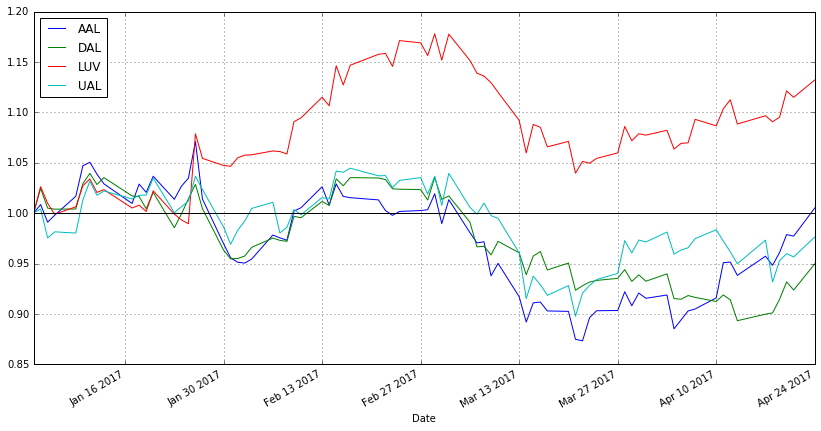

In [13]:
stock_returns.plot(grid = True).axhline(y = 1, color = "black", lw = 1)

In [14]:
un["20d"] = np.round(un["Adj Close"].rolling(window = 20, center = False).mean(), 2)

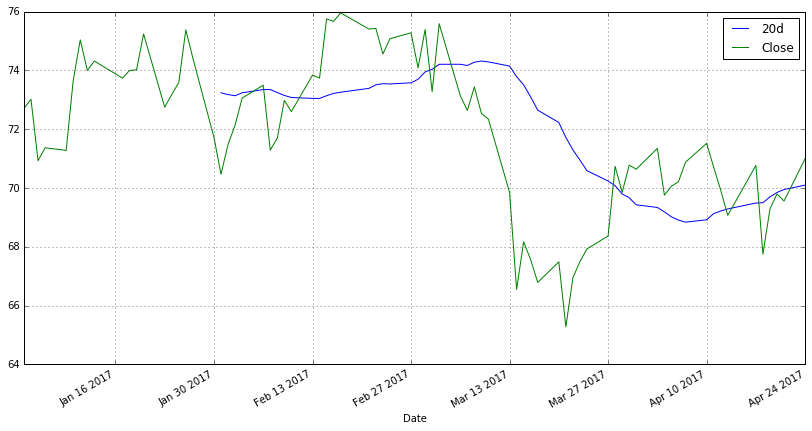

In [20]:
un_ma = un[['20d','Close']]
un_ma.plot(grid = True)